In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

from anonymeter.evaluators import SinglingOutEvaluator
from anonymeter.evaluators import LinkabilityEvaluator
from anonymeter.evaluators import InferenceEvaluator

In [23]:
train = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/low_cor/train.csv")
control = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/low_cor/control.csv")

slow_cor = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/low_cor/slow_cor.csv")
slow_cor09 = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/low_cor/slow_cor09.csv")
synlow_cor = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/low_cor/synlow_cor.csv")

In [3]:
base_path = "C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/low_cor"

for i in range(100, 59, -1):  
    suffix = f"{i:03d}"  
    filename = f"slow_cor{suffix}.csv"
    full_path = f"{base_path}/{filename}"
    
    try:
        globals()[f"slow_cor{suffix}"] = pd.read_csv(full_path)
        print(f"Imported: slow_cor{suffix}")
    except FileNotFoundError:
        print(f"File not found: {filename}")


Imported: slow_cor100
Imported: slow_cor099
Imported: slow_cor098
Imported: slow_cor097
Imported: slow_cor096
Imported: slow_cor095
Imported: slow_cor094
Imported: slow_cor093
Imported: slow_cor092
Imported: slow_cor091
Imported: slow_cor090
Imported: slow_cor089
Imported: slow_cor088
Imported: slow_cor087
Imported: slow_cor086
Imported: slow_cor085
Imported: slow_cor084
Imported: slow_cor083
Imported: slow_cor082
Imported: slow_cor081
Imported: slow_cor080
Imported: slow_cor079
Imported: slow_cor078
Imported: slow_cor077
Imported: slow_cor076
Imported: slow_cor075
Imported: slow_cor074
Imported: slow_cor073
Imported: slow_cor072
Imported: slow_cor071
Imported: slow_cor070
Imported: slow_cor069
Imported: slow_cor068
Imported: slow_cor067
Imported: slow_cor066
Imported: slow_cor065
Imported: slow_cor064
Imported: slow_cor063
Imported: slow_cor062
Imported: slow_cor061
Imported: slow_cor060


## Singling Out Risk

## Synthesizer

In [52]:
sevaluator1_uni = SinglingOutEvaluator(ori=train, 
                                 syn=slow_cor, 
                                 control=control,
                                 n_attacks=2200)

try:
    sevaluator1_uni.evaluate(mode='univariate')
    risk = sevaluator1_uni.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_uni.queries()[:3])
res = sevaluator1_uni.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.0, ci=(0.0, 0.0))
['zip_code <= 10001.7860414907']
Successs rate of main attack: SuccessRate(value=0.0013252901648878068, error=0.0012450472240696433)
Successs rate of baseline attack: SuccessRate(value=0.0008715370167211898, error=0.0008715370167211898)
Successs rate of control attack: SuccessRate(value=0.00983980417748683, error=0.004031313739178421)


## Synthpop

In [53]:
sevaluator1_uni = SinglingOutEvaluator(ori=train, 
                                 syn=synlow_cor, 
                                 control=control,
                                 n_attacks=2000)

try:
    sevaluator1_uni.evaluate(mode='univariate')
    risk = sevaluator1_uni.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_uni.queries()[:3])
res = sevaluator1_uni.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.8079742229649095, ci=(0.787729701366288, 0.8282187445635311))
['zip_code == 65915', 'zip_code == 63685', 'zip_code == 39165']
Successs rate of main attack: SuccessRate(value=0.847332867546124, error=0.01573355624375471)
Successs rate of baseline attack: SuccessRate(value=0.029902929269470135, error=0.007402527653340259)
Successs rate of control attack: SuccessRate(value=0.20496542281415803, error=0.01766553585841383)


# Singling Out Multivariate Risk

## Synthesizer

In [54]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=slow_cor, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.03548585471110607, ci=(0.0, 0.13109426670471472))
["job== 'Service' & age<= 22 & zip_code<= 10005.3274886422", "job== 'Executive' & zip_code>= 90991.6833701676 & income<= 6800.0", "age<= 18 & income>= 450658.824996651 & ethnicity== 'Asian'"]
Successs rate of main attack: SuccessRate(value=0.40274718536523213, error=0.04281844503908718)
Successs rate of baseline attack: SuccessRate(value=0.007781672868929911, error=0.006684042346247121)
Successs rate of control attack: SuccessRate(value=0.38077340021189937, error=0.04238953383398732)


In [55]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=slow_cor, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.26361618318784963, ci=(0.2131657164387617, 0.31406664993693756))
['zip_code>= 68874.9858800322 & income>= 510236.885711455 & age<= 20', "education_level== 'Master\\'s' & ethnicity== 'Other' & zip_code>= 99897.2597810305", "age>= 79 & income>= 301828.558159106 & education_level== 'High School'"]
Successs rate of main attack: SuccessRate(value=0.4178942572869683, error=0.03409322900595444)
Successs rate of baseline attack: SuccessRate(value=0.017317754959752876, error=0.008716644078561568)
Successs rate of control attack: SuccessRate(value=0.20950769228878174, error=0.028098281508585492)


In [56]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=slow_cor, 
                                 control=control,
                                 n_attacks=1000)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.1893341854915314, ci=(0.140442937736525, 0.23822543324653778))
["age>= 85 & income<= 1600.0 & ethnicity== 'White'", "age>= 86 & marital_status== 'Married' & zip_code>= 99967.0015472365", "age<= 43 & zip_code>= 99937.0 & marital_status== 'Divorced'"]
Successs rate of main attack: SuccessRate(value=0.3864362504673533, error=0.030118887472494273)
Successs rate of baseline attack: SuccessRate(value=0.011875111657922011, error=0.006434357212392761)
Successs rate of control attack: SuccessRate(value=0.24313602652078145, error=0.026518552418342226)


## Synthesizer rankcor = 0.9

In [57]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=slow_cor09, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.04511965198099242, ci=(0.0, 0.12031816891376755))
["income>= 1250863.77648971 & zip_code>= 78165.0 & job== 'Executive'", "income>= 1132792.3038275 & education_level== 'Master\\'s' & age<= 43", "education_level== 'Bachelor\\'s' & age>= 88 & ethnicity== 'White'"]
Successs rate of main attack: SuccessRate(value=0.30549437073046426, error=0.040192307673199576)
Successs rate of baseline attack: SuccessRate(value=0.013735926826160597, error=0.009457172929570103)
Successs rate of control attack: SuccessRate(value=0.2726778483708923, error=0.03884671898173222)


In [58]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=slow_cor09, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.15778618137420905, ci=(0.10523003997921919, 0.2103423227691989))
["income<= 4700.0 & ethnicity== 'Black' & zip_code<= 10030.3321422823", "ethnicity== 'White' & age<= 21 & income>= 311884.173637162", "education_level== 'Bachelor\\'s' & income>= 1276765.01350414 & job== 'Executive'"]
Successs rate of main attack: SuccessRate(value=0.3457407258118798, error=0.032870278753092834)
Successs rate of baseline attack: SuccessRate(value=0.009853596531295446, error=0.0064118777583580715)
Successs rate of control attack: SuccessRate(value=0.22316725311435667, error=0.028752821222008212)


In [59]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=slow_cor09, 
                                 control=control,
                                 n_attacks=1000)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.2250537099110976, ci=(0.18591023393655676, 0.26419718588563845))
["job== 'Executive' & age<= 18 & zip_code<= 10002.831682899", "education_level== 'PhD' & age>= 84 & income<= 2400.0", "income<= 7700.0 & job== 'Professional' & zip_code<= 10233.9624609416"]
Successs rate of main attack: SuccessRate(value=0.33463524190860217, error=0.029182923034597963)
Successs rate of baseline attack: SuccessRate(value=0.010878938416407566, error=0.006136877748930503)
Successs rate of control attack: SuccessRate(value=0.14140532498701724, error=0.021510831926986596)


## Synthpop

In [60]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synlow_cor, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.14086753970094826, ci=(0.0764233735725437, 0.20531170582935282))
["ethnicity== 'White' & gender== 'Male' & income>= 538300.0", "age>= 88 & income<= 17000.0 & job== 'Executive'", "marital_status== 'Married' & income<= 1800.0 & age>= 73"]
Successs rate of main attack: SuccessRate(value=0.3213723812830794, error=0.04075463059358917)
Successs rate of baseline attack: SuccessRate(value=0.047476699250467824, error=0.018242743621860638)
Successs rate of control attack: SuccessRate(value=0.21010129394866534, error=0.03550215540069089)


In [61]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synlow_cor, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.2021551275918396, ci=(0.15698914674592773, 0.24732110843775146))
["gender== 'Female' & ethnicity== 'Hispanic' & zip_code<= 10096", "job== 'Executive' & zip_code<= 10678 & income>= 388100.0", "education_level== 'Master\\'s' & income>= 742100.0 & job== 'Management'"]
Successs rate of main attack: SuccessRate(value=0.3270803297407362, error=0.032421269352763515)
Successs rate of baseline attack: SuccessRate(value=0.04219828305461098, error=0.013723749294057706)
Successs rate of control attack: SuccessRate(value=0.1565783104826267, error=0.02506789569955051)


In [ ]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synlow_cor, 
                                 control=control,
                                 n_attacks=1000)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

# Linkability

In [25]:
aux_cols = [["age","zip_code","gender","education_level"],
            ["ethnicity","marital_status","job","income"]]

## synthesizer rankcor = 1

### n_neighbors = 1 

In [27]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=slow_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=1)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.1516771673009717, ci=(0.14054624195598206, 0.16280809264596133))
Successs rate of main attack: SuccessRate(value=0.1520841261256385, error=0.011118140107031544)
Successs rate of baseline attack: SuccessRate(value=0.00047972164485074323, error=0.00047972164485074323)
Successs rate of control attack: SuccessRate(value=0.00047972164485074323, error=0.00047972164485074323)


### n_neighbors = 10

In [5]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=slow_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.8728859564153624, ci=(0.8625480821562549, 0.8832238306744699))
Successs rate of main attack: SuccessRate(value=0.8733914080704741, error=0.01029396313073717)
Successs rate of baseline attack: SuccessRate(value=0.00247780275827134, error=0.0014640164896803135)
Successs rate of control attack: SuccessRate(value=0.003976363593336788, error=0.00189029643355562)


### n_neighbors = 20

In [28]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=slow_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.9734641292553192, ci=(0.9684739601385237, 0.9784542983721147))
Successs rate of main attack: SuccessRate(value=0.9737949840198591, error=0.004927122221512188)
Successs rate of baseline attack: SuccessRate(value=0.013966769160439773, error=0.0036049270894928822)
Successs rate of control attack: SuccessRate(value=0.012468208325374326, error=0.003405051934794924)


## synthpop

### n_neighbors = 1

In [29]:
levaluator21 = LinkabilityEvaluator(ori=train, 
                                 syn=synlow_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=1)

levaluator21.evaluate(n_jobs=-2) 
print(levaluator21.risk())
res = levaluator21.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.00224892010825164, ci=(0.0006322684994291912, 0.003865571717074089))
Successs rate of main attack: SuccessRate(value=0.002727562897448915, error=0.001543358850427869)
Successs rate of baseline attack: SuccessRate(value=0.00047972164485074323, error=0.00047972164485074323)
Successs rate of control attack: SuccessRate(value=0.00047972164485074323, error=0.00047972164485074323)


### n_neighbors = 10

In [6]:
levaluator2 = LinkabilityEvaluator(ori=train, 
                                 syn=synlow_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator2.evaluate(n_jobs=-2) 
print(levaluator2.risk())
res = levaluator2.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.03461317878281713, ci=(0.02833821218372285, 0.04088814538191141))
Successs rate of main attack: SuccessRate(value=0.03869302293901966, error=0.005957453286223955)
Successs rate of baseline attack: SuccessRate(value=0.00247780275827134, error=0.0014640164896803135)
Successs rate of control attack: SuccessRate(value=0.004226123732514363, error=0.001952207461767974)


### n_neighbors = 20

In [30]:
levaluator2 = LinkabilityEvaluator(ori=train, 
                                 syn=synlow_cor, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator2.evaluate(n_jobs=-2) 
print(levaluator2.risk())
res = levaluator2.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.048583970465583624, ci=(0.04037625951376611, 0.05679168141740114))
Successs rate of main attack: SuccessRate(value=0.0609216753258238, error=0.007396778136879508)
Successs rate of baseline attack: SuccessRate(value=0.009720846794421005, error=0.003002408161306554)
Successs rate of control attack: SuccessRate(value=0.012967728603729474, error=0.0034730243526355305)


## synthesizer rankcor = [0.70,0.99]

In [10]:
linkability_results = []
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]

for suffix in suffixes:  
    syn_varname = f"slow_cor{suffix}"
    
    if syn_varname in globals():
        syn_data = globals()[syn_varname]
        
        print(f"Evaluating dataset: {syn_varname}")
        
        levaluator = LinkabilityEvaluator(
            ori=train,
            syn=syn_data,
            control=control,
            n_attacks=4000,
            aux_cols=aux_cols,
            n_neighbors=10
        )
        
        levaluator.evaluate(n_jobs=-2)
        
        res = levaluator.results()

        privacy_risk = levaluator.risk()
        print(f"Privacy risk for {syn_varname}: {privacy_risk}")
        
        linkability_results.append({
            "rankcor": int(suffix) / 100,  
            "attack_rate": res.attack_rate.value,  
            "baseline_rate": res.baseline_rate.value, 
            "control_rate": res.control_rate.value,   
            "risk": privacy_risk  
        })

df_link = pd.DataFrame(linkability_results)

df_link = df_link.sort_values(by="rankcor", ascending=False)

Evaluating dataset: slow_cor100
Privacy risk for slow_cor100: PrivacyRisk(value=0.8798469006479224, ci=(0.8697537553637535, 0.8899400459320912))
Evaluating dataset: slow_cor099
Privacy risk for slow_cor099: PrivacyRisk(value=0.7975064539038528, ci=(0.7850181614544296, 0.809994746353276))
Evaluating dataset: slow_cor098
Privacy risk for slow_cor098: PrivacyRisk(value=0.810352292299056, ci=(0.7981734740922622, 0.8225311105058498))
Evaluating dataset: slow_cor097
Privacy risk for slow_cor097: PrivacyRisk(value=0.5990590490882793, ci=(0.5838094121557539, 0.6143086860208048))
Evaluating dataset: slow_cor096
Privacy risk for slow_cor096: PrivacyRisk(value=0.6474262485837473, ci=(0.632544128588756, 0.6623083685787386))
Evaluating dataset: slow_cor095
Privacy risk for slow_cor095: PrivacyRisk(value=0.5599409194701247, ci=(0.544487985842357, 0.5753938530978924))
Evaluating dataset: slow_cor094
Privacy risk for slow_cor094: PrivacyRisk(value=0.5491830240998866, ci=(0.5336810084483887, 0.56468503

In [11]:
df_link['risk_value'] = df_link['risk'].apply(lambda x: x.value)
df_link['risk_ci_lower'] = df_link['risk'].apply(lambda x: x.ci[0])
df_link['risk_ci_upper'] = df_link['risk'].apply(lambda x: x.ci[1])

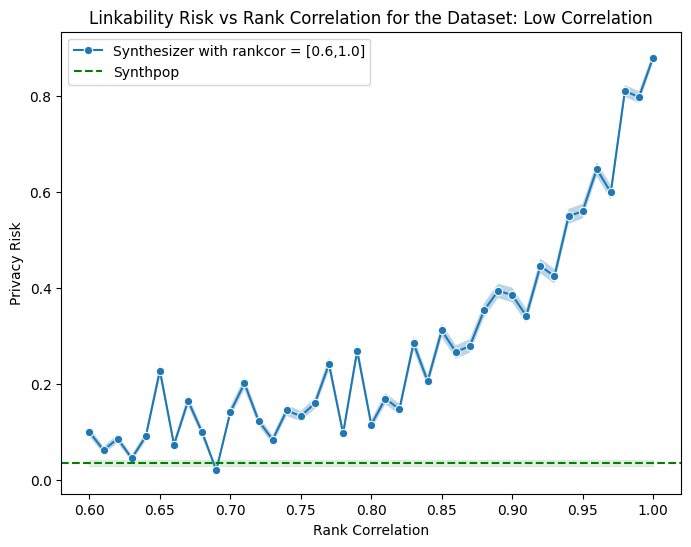

In [22]:
risk1 = levaluator2.risk()

row1 = {
    'rankcor': 1.00,  
    'risk_value': risk1.value,
    'risk_ci_lower': risk1.ci[0],
    'risk_ci_upper': risk1.ci[1]
}


plt.figure(figsize=(8, 6))
sns.lineplot(
    x='rankcor',
    y='risk_value',
    data=df_link,
    marker='o',
    label='Synthesizer with rankcor = [0.6,1.0]'
)

plt.fill_between(
    df_link['rankcor'],
    df_link['risk_ci_lower'],
    df_link['risk_ci_upper'],
    alpha=0.3
)

plt.axhline(y=risk1.value, color='green', linestyle='--', label='Synthpop')
plt.fill_between(
    df_link['rankcor'],
    risk1.ci[0],
    risk1.ci[1],
    color='green',
    alpha=0.1
)

plt.xlabel('Rank Correlation')
plt.ylabel('Privacy Risk')
plt.title('Linkability Risk vs Rank Correlation for the Dataset: Low Correlation')
plt.legend()
plt.show()



# Inference

## synthesizer rankcor = 1

In [13]:
columns = train.columns
results1 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator1 = InferenceEvaluator(ori=train, 
                                   syn=slow_cor, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=2000)
    ievaluator1.evaluate(n_jobs=-2)
    results1.append((secret, ievaluator1.results()))

print(ievaluator1.risk())

PrivacyRisk(value=0.9948461620996798, ci=(0.9918033884559632, 0.9978889357433964))


## synthpop

In [14]:
columns = train.columns
results3 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator3 = InferenceEvaluator(ori=train, 
                                   syn=synlow_cor, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=1000)
    ievaluator3.evaluate(n_jobs=-2)
    results3.append((secret, ievaluator3.results()))

print(ievaluator3.risk())

PrivacyRisk(value=0.056787067869983936, ci=(0.03250008760865961, 0.08107404813130825))


## synthesizer rankcor = [0.70,0.99]

In [15]:
columns = train.columns

for i in range(100, 59, -1):  
    suffix = f"{i:03d}"  
    
    syn_data_varname = f"slow_cor{suffix}"
    results_varname = f"results{suffix}"
    
    if syn_data_varname in globals():
        syn_data = globals()[syn_data_varname]
        results_list = []

        print(f"\nRunning inference attacks on: {syn_data_varname}")
        
        for secret in columns:
            aux_cols = [col for col in columns if col != secret]
            
            ievaluator = InferenceEvaluator(
                ori=train,
                syn=syn_data,
                control=control,
                aux_cols=aux_cols,
                secret=secret,
                n_attacks=2000
            )
            ievaluator.evaluate(n_jobs=-2)
            results_list.append((secret, ievaluator.results()))
        
        globals()[results_varname] = results_list

        print(f"Risk for {syn_data_varname}: {ievaluator.risk()}")
    else:
        print(f"{syn_data_varname} not found in globals.")



Running inference attacks on: slow_cor100
Risk for slow_cor100: PrivacyRisk(value=0.9916510795835389, ci=(0.9876878199797375, 0.9956143391873403))

Running inference attacks on: slow_cor099
Risk for slow_cor099: PrivacyRisk(value=0.9025666738632447, ci=(0.8891750702594259, 0.9159582774670636))

Running inference attacks on: slow_cor098
Risk for slow_cor098: PrivacyRisk(value=0.8616148951162051, ci=(0.8459776176154147, 0.8772521726169956))

Running inference attacks on: slow_cor097
Risk for slow_cor097: PrivacyRisk(value=0.8057359404240244, ci=(0.7876960762714283, 0.8237758045766205))

Running inference attacks on: slow_cor096
Risk for slow_cor096: PrivacyRisk(value=0.6907664874237418, ci=(0.6696244131174921, 0.7119085617299915))

Running inference attacks on: slow_cor095
Risk for slow_cor095: PrivacyRisk(value=0.6453908645963297, ci=(0.6233836618443254, 0.667398067348334))

Running inference attacks on: slow_cor094
Risk for slow_cor094: PrivacyRisk(value=0.595312665332989, ci=(0.57261

C:\Users\maria\AppData\Local\Temp\ipykernel_23844\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23844\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23844\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23844\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')


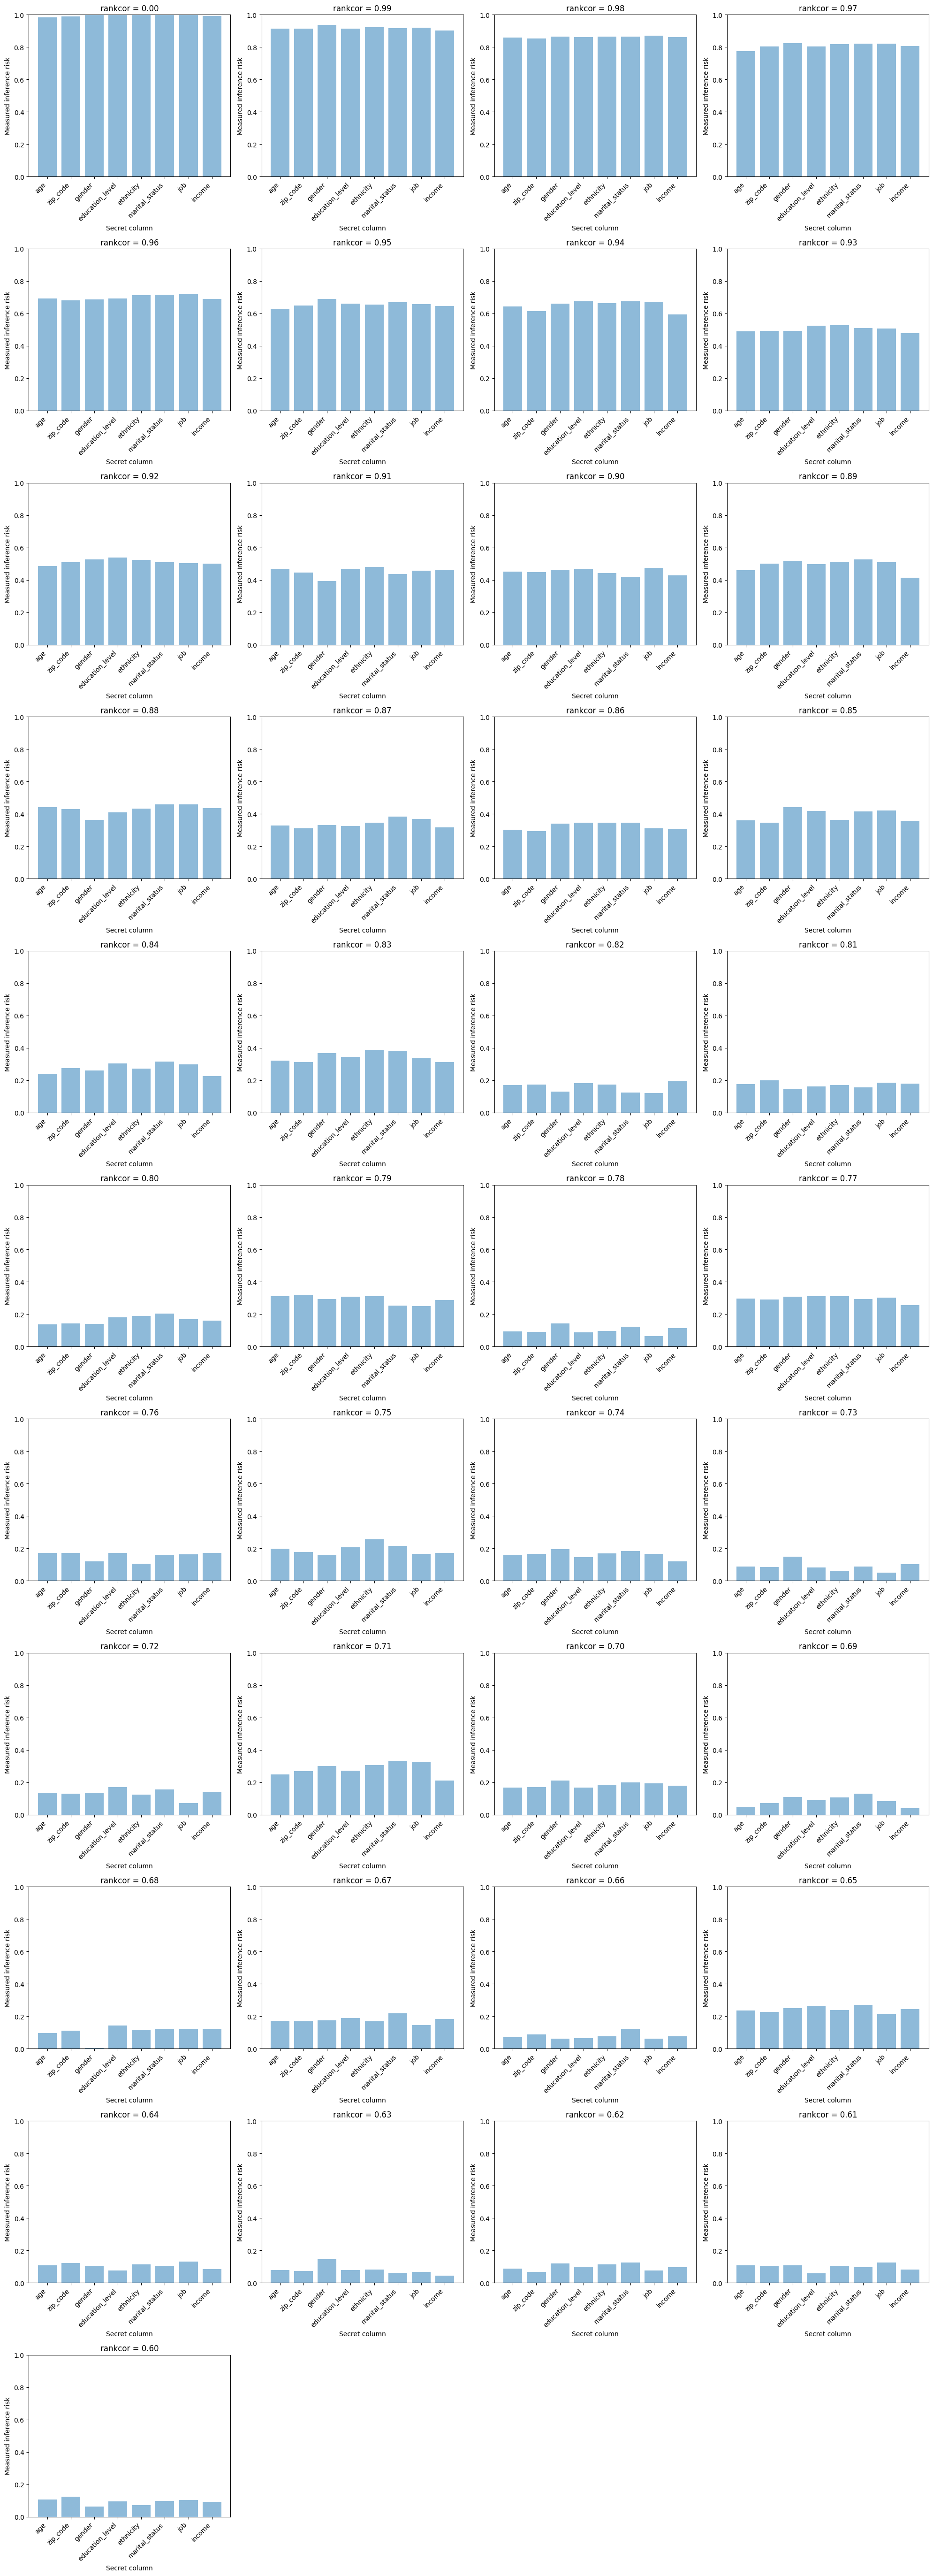

In [16]:
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]
num_plots = len(suffixes)

cols = 4
rows = math.ceil(num_plots / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  

for idx, suffix in enumerate(suffixes):
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        risks = [res[1].risk().value for res in results]
        secrets = [res[0] for res in results]

        ax = axes[idx]
        ax.bar(x=secrets, height=risks, alpha=0.5, ecolor='black', capsize=10)
        ax.set_xticklabels(secrets, rotation=45, ha='right')
        ax.set_ylabel("Measured inference risk")
        ax.set_xlabel("Secret column")
        ax.set_ylim(0, 1)
        ax.set_title(f"rankcor = 0.{suffix[-2:]}")
    else:
        axes[idx].axis("off") 
        
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


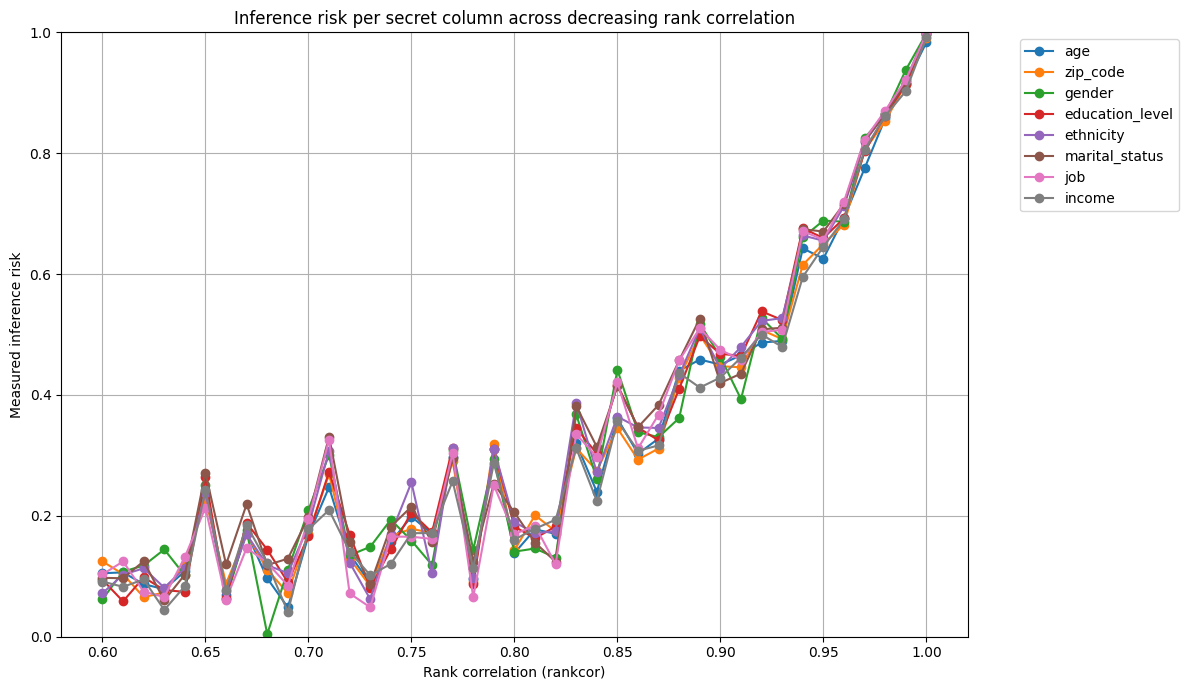

In [17]:
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]
rankcors = [int(suffix) / 100 for suffix in suffixes]

secret_columns = [res[0] for res in globals()[f"results{suffixes[0]}"]]

risk_by_secret = {secret: [] for secret in secret_columns}

for suffix in suffixes:
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        for secret, result in results:
            risk_by_secret[secret].append(result.risk().value)
    else:
        for secret in secret_columns:
            risk_by_secret[secret].append(None)  

plt.figure(figsize=(12, 7))

for secret, risks in risk_by_secret.items():
    plt.plot(rankcors, risks, marker='o', label=secret)

plt.xlabel("Rank correlation (rankcor)")
plt.ylabel("Measured inference risk")
plt.title("Inference risk per secret column across decreasing rank correlation")
plt.xticks(rankcors[::5])
plt.ylim(0, 1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


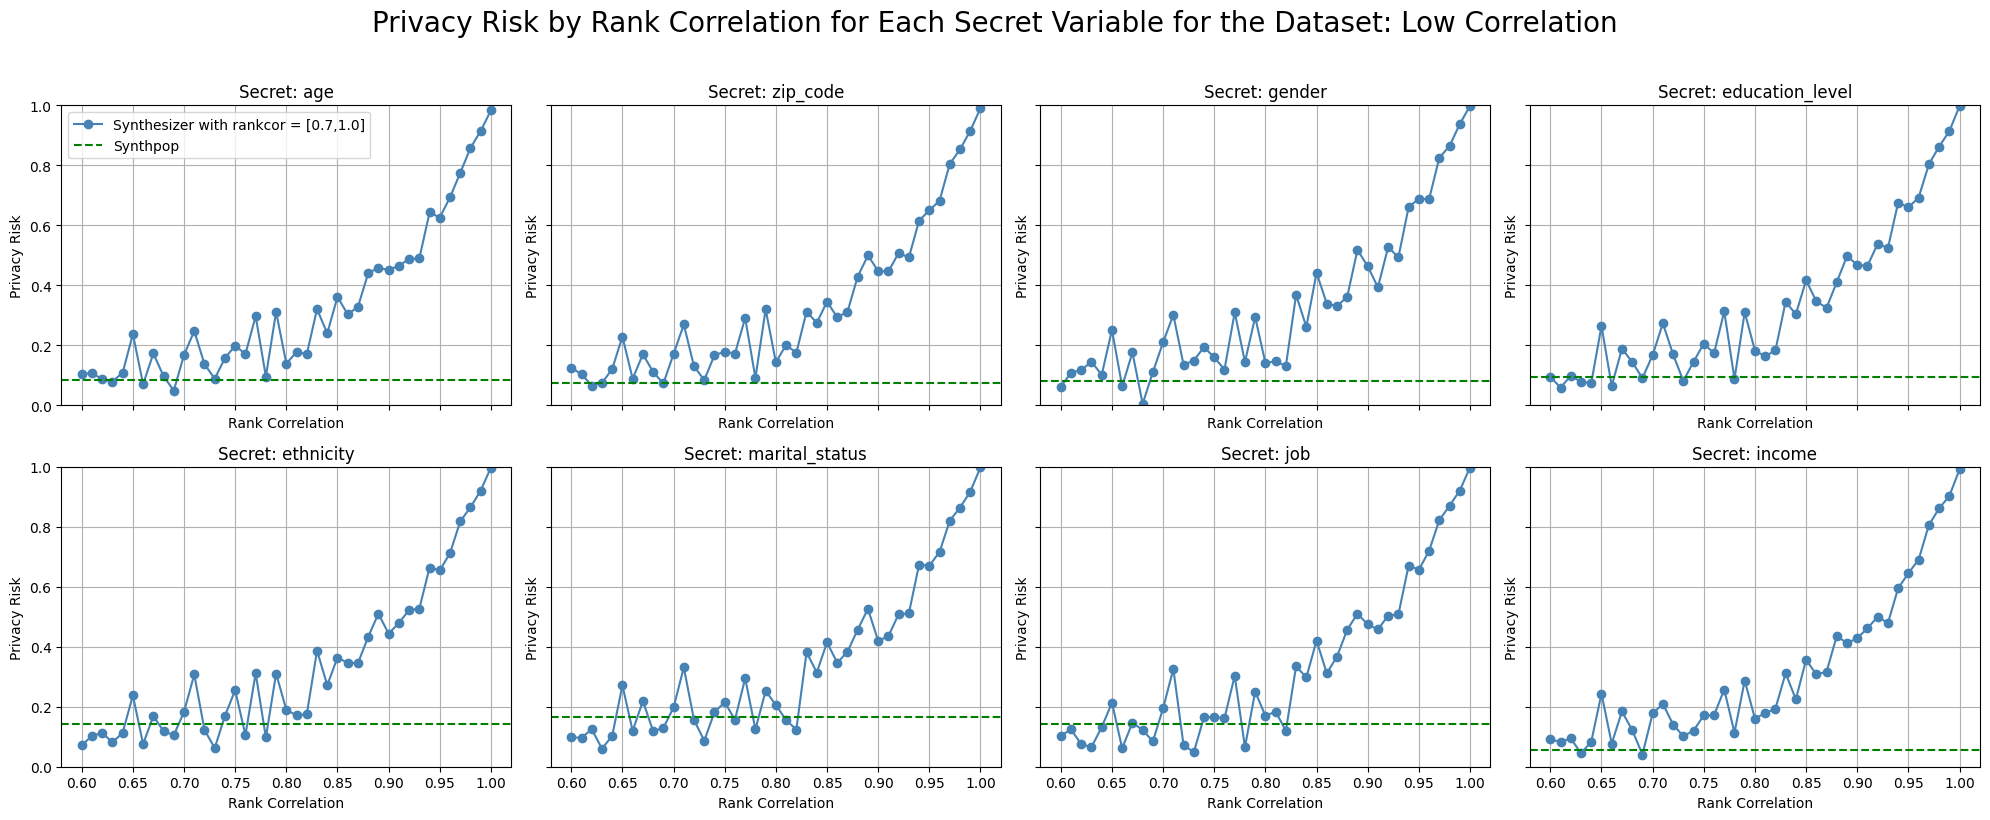

In [21]:
rankcors = [int(suffix) / 100 for suffix in suffixes]

risk1_dict = {secret: result.risk().value for secret, result in results3}

n = len(secret_columns)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, secret in enumerate(secret_columns):
    ax = axes[idx]
    
    ax.plot(rankcors, risk_by_secret[secret], marker='o', color='steelblue', label='Synthesizer with rankcor = [0.7,1.0]')

    if secret in risk1_dict:
        ax.axhline(y=risk1_dict[secret], color='green', linestyle='--', label='Synthpop')
    
    ax.set_title(f"Secret: {secret}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("Rank Correlation")
    ax.set_ylabel("Privacy Risk")
    ax.grid(True)

    if idx == 0:
        ax.legend()

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Privacy Risk by Rank Correlation for Each Secret Variable for the Dataset: Low Correlation", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

